In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as  sns

In [3]:
train_df=pd.read_csv("./test_data_scientist/train.csv")
test_df=pd.read_csv("./test_data_scientist/test.csv")
bu_feat=pd.read_csv("./test_data_scientist/bu_feat.csv")

# Weird BU label

In [26]:
bu_feat

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,1609,80100,50.096306,1.867220,69,4
1,1995,95700,48.991087,2.520903,3,6
2,1800,73210,45.552933,6.644736,51,4
3,238,47550,44.175370,0.638869,134,10
4,201,13546,43.508418,5.406423,71,10
...,...,...,...,...,...,...
321,52,30900,43.808731,4.367886,6,10
322,1409,83600,43.423641,6.753685,55,10
323,379,31621,43.764840,1.375426,33,3
324,436,14630,49.160428,-0.286385,33,3


In [38]:
bu_feat["but_region_idr_region"].unique()

array([ 69,   3,  51, 134,  71,  72,  55,   6,  75,  31,  70,  33, 107,
       178,  65, 115,  30,  53,  66,  74,   8,  52,   7,  64,   2,   4,
       121,  32, 162], dtype=int64)

In [12]:
len(bu_feat["but_region_idr_region"].unique())

29

In [37]:
len(bu_feat["zod_idr_zone_dgr"].unique())

8

In [40]:
palette_region_idr = sns.color_palette(None,len(bu_feat["but_region_idr_region"].unique()))
color_palette_region_idr = dict(zip(bu_feat["but_region_idr_region"].unique(), palette_region_idr))
palette_zone_idr = sns.color_palette(None,len(bu_feat["zod_idr_zone_dgr"].unique()))
color_palette_zone_idr = dict(zip(bu_feat["zod_idr_zone_dgr"].unique(), palette_zone_idr))

Text(0.5, 0, 'lat')

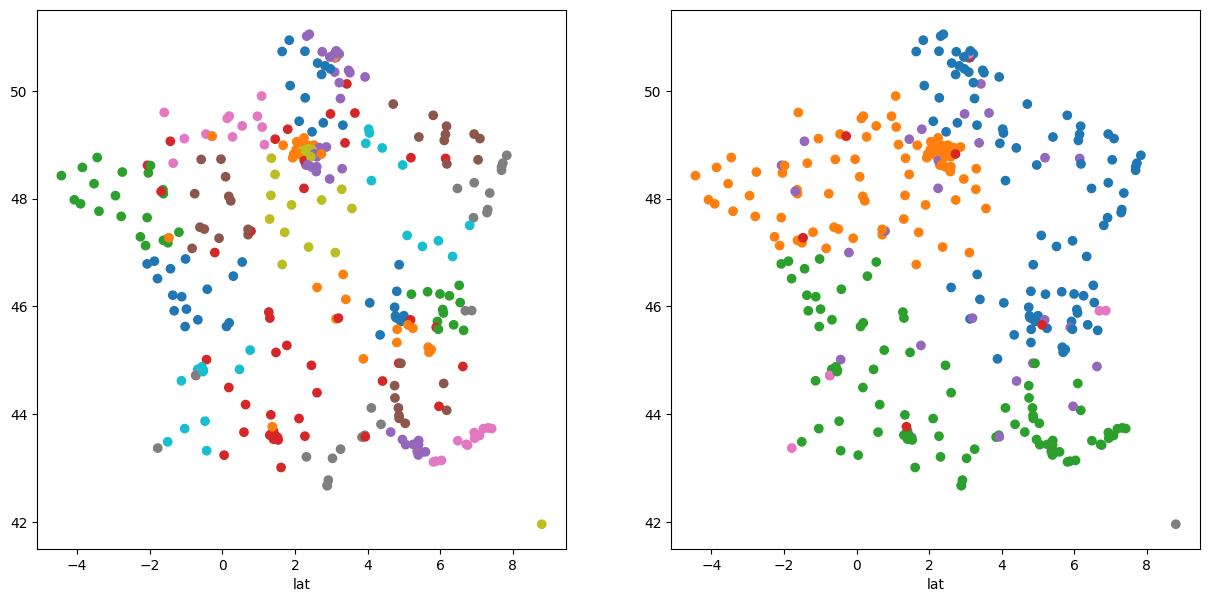

In [44]:
lat=[]
long=[]
region_idr=[]
zone_idr=[]
color_region_idr=[]
color_zone_idr=[]
for k in range(0,len(bu_feat)):
    sample = bu_feat.loc[k]
    lat.append(sample["but_latitude"])
    long.append(sample["but_longitude"])
    region_idr.append(sample["but_region_idr_region"])
    zone_idr.append(sample["zod_idr_zone_dgr"])
    color_region_idr.append(color_palette_region_idr[int(sample["but_region_idr_region"])])
    color_zone_idr.append(color_palette_zone_idr[int(sample["zod_idr_zone_dgr"])])
fig,axs=plt.subplots(1,2,figsize=(15,7))
axs[0].scatter(long,lat,color=color_region_idr)
axs[0].set_xlabel('long')
axs[0].set_xlabel('lat')
axs[1].scatter(long,lat,color=color_zone_idr)
axs[1].set_xlabel('long')
axs[1].set_xlabel('lat')


# Questions

In [45]:
train_df

,day_id,but_num_business_unit,dpt_num_department,turnover
0,2017-09-30,64,127,580.308443
1,2017-09-30,119,127,1512.995918
2,2017-09-30,4,88,668.593556
3,2017-09-30,425,127,0.000000
4,2017-09-30,513,73,0.000000
...,...,...,...,...
277714,2012-12-29,131,73,1.461821
277715,2012-12-29,237,127,759.283046
277716,2012-12-29,129,117,1716.399152
277717,2012-12-29,468,127,1307.357057


In [99]:
def calculate_year_turnover_all_dep(df:pd.DataFrame,year:int):
    df_year=df[(pd.to_datetime(df["day_id"])>pd.Timestamp('{}-01-01'.format(year))) 
                        & (pd.to_datetime(df["day_id"])<pd.Timestamp('{}-12-31'.format(year)))]
    department_list=df_year["dpt_num_department"].unique()
    turnover_per_department=[]
    for department in department_list:
        turnover_per_department.append(calculate_turnover_dep(df_year,department))
    return dict(zip(department_list,turnover_per_department))

def calculate_turnover_dep(df:pd.DataFrame,department:int):
    df_dep=df[df["dpt_num_department"]==department]
    turnover=df_dep["turnover"].sum()
    return turnover

In [100]:
a=calculate_year_turnover_all_dep(train_df,2016)

In [101]:
a

{73: 1955585.3568329916,
 88: 5629350.037842074,
 117: 6244515.292270355,
 127: 33295437.77505804}

In [102]:
pd.DataFrame([a])

,73,88,117,127
0,1.955585e+06,5.629350e+06,6.244515e+06,3.329544e+07


In [ ]:
for year in range(2012,2018):
    calculate_year_turnover_all_dep(train_df,year)

Let's get all lines corresponding to 2016 year

In [66]:
df_2016 = train_df[(pd.to_datetime(train_df["day_id"])>pd.Timestamp('2016-01-01')) & (pd.to_datetime(train_df["day_id"])<pd.Timestamp('2016-12-31'))]
print(df_2016)

            day_id  but_num_business_unit  dpt_num_department     turnover
49993   2016-12-24                    241                  73    28.117181
49994   2016-12-24                    513                  73     0.000000
49995   2016-12-24                    554                  88   354.824754
49996   2016-12-24                    118                 117  4516.822093
49997   2016-12-24                    118                  88  1082.075131
...            ...                    ...                 ...          ...
110898  2016-01-02                    693                 117   335.051681
110899  2016-01-02                    482                  73     6.190178
110900  2016-01-02                    131                  73     2.221333
110901  2016-01-02                     78                 117  1225.865225
110902  2016-01-02                    308                 117   836.065188

[60910 rows x 4 columns]


In [82]:
department_list=train_df["dpt_num_department"].unique()
turnover_per_department=[]
for department in department_list:
    df_2016_dep=df_2016[df_2016["dpt_num_department"]==department]
    turnover_per_department.append(df_2016_dep["turnover"].sum())
turnover_df=pd.DataFrame({
                            'department':department_list,
                            '2016 turnover':turnover_per_department
                            },columns=['department','2016 turnover'])

In [83]:
turnover_df

,department,2016 turnover
0,127,3.329544e+07
1,88,5.629350e+06
2,73,1.955585e+06
3,117,6.244515e+06


In [79]:
turnover_df

,department,2016 turnover


In [76]:
department_list

array([127,  88,  73, 117], dtype=int64)

In [77]:
turnover_per_department

[33295437.77505804, 5629350.037842074, 1955585.3568329916, 6244515.292270355]

In [74]:
train_df["dpt_num_department"].unique()

array([127,  88,  73, 117], dtype=int64)

In [60]:
pd.DatetimeIndex(train_df["day_id"])

DatetimeIndex(['2017-09-30', '2017-09-30', '2017-09-30', '2017-09-30',
               '2017-09-30', '2017-09-30', '2017-09-30', '2017-09-30',
               '2017-09-30', '2017-09-30',
               ...
               '2012-12-29', '2012-12-29', '2012-12-29', '2012-12-29',
               '2012-12-29', '2012-12-29', '2012-12-29', '2012-12-29',
               '2012-12-29', '2012-12-29'],
              dtype='datetime64[ns]', name='day_id', length=277719, freq=None)

In [47]:
train_df[train_df["day_id"]]

array([127,  88,  73, 117], dtype=int64)